In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
df = pd.read_csv("/home/yeajin/Data_practice/Classification/weather_forecast_data.csv")
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [9]:
df['Rain'].value_counts()

no rain    2186
rain        314
Name: Rain, dtype: int64

In [4]:
df['Rain'] = df['Rain'].replace({ 'no rain': 0, 'rain': 1})
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,0
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,0
2497,28.108274,43.817178,2.897128,75.842952,999.119187,0
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,0


In [13]:
corr = df.corr()
corr['Rain'].sort_values

<bound method Series.sort_values of Temperature   -0.265882
Humidity       0.382464
Wind_Speed    -0.001389
Cloud_Cover    0.326216
Pressure       0.008273
Rain           1.000000
Name: Rain, dtype: float64>

<AxesSubplot: >

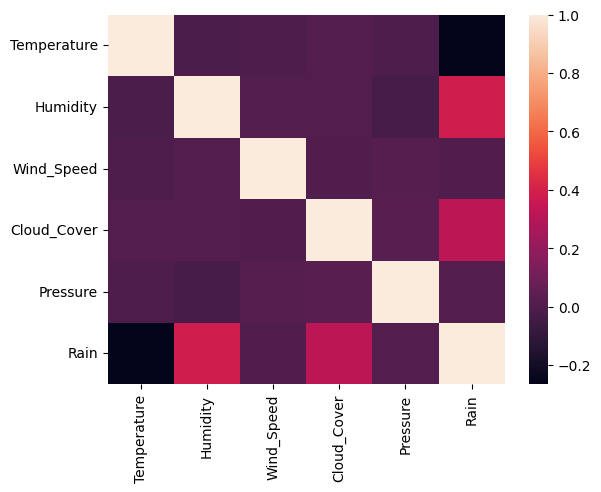

In [14]:
sns.heatmap(corr)

* Humidity, Cloud_Cover 컬럼 상관계수 낮지만 일단 보류

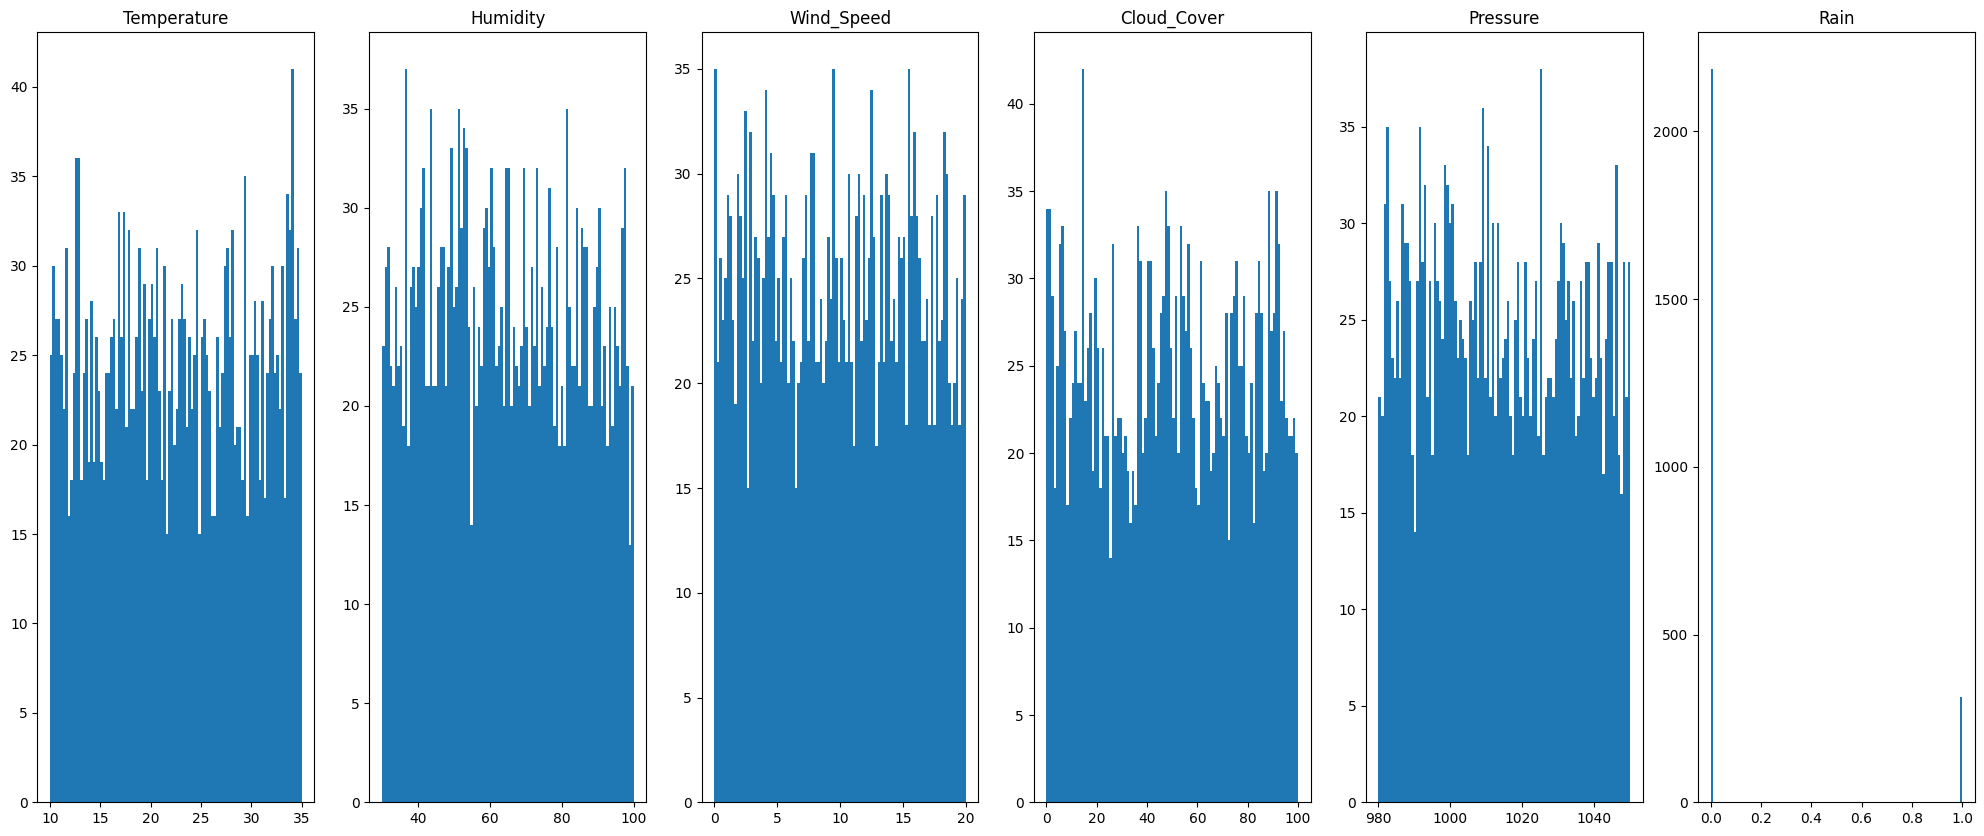

In [5]:
#데이터 시각화 

cols = df.columns

fig, axis = plt.subplots(1, 6, figsize=(25, 10))

i = 1
for col in cols:
    plt.subplot(1, 6, i)
    plt.hist(df[col], bins=100)
    plt.title(col)
    i+=1

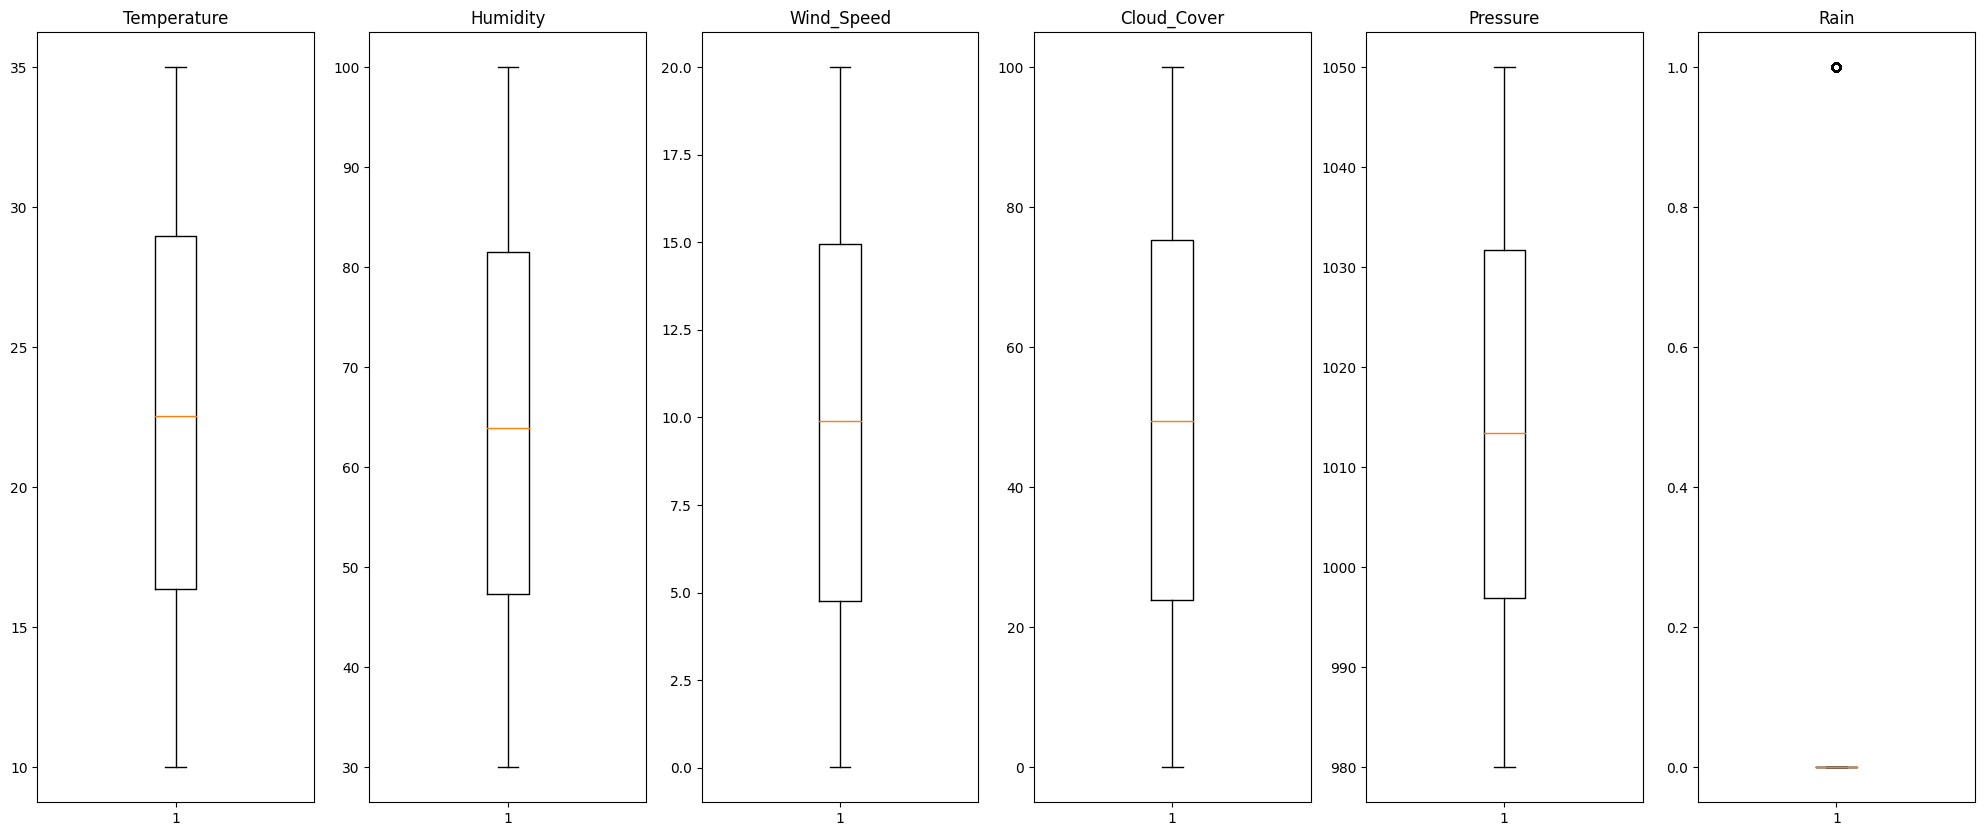

In [7]:
fig, axis = plt.subplots(1, 6, figsize=(25, 10))

for  i, (col, ax) in enumerate(zip(cols, axis)):
    plt.subplot(1, 6, i+1)
    plt.boxplot(df[col])
    plt.title(col)

In [23]:
df['Pressure'] = np.log(df['Pressure'])
df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,6.939621,1
1,27.879734,46.489704,5.952484,4.990053,6.900342,0
2,25.069084,83.072843,1.371992,14.855784,6.914961,0
3,23.622080,74.367758,7.050551,67.255282,6.890235,1
4,20.591370,96.858822,4.643921,47.676444,6.888394,0
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,6.925287,0
2496,27.558479,46.481744,10.884915,39.715133,6.916310,0
2497,28.108274,43.817178,2.897128,75.842952,6.906874,0
2498,14.789275,57.908105,2.374717,2.378743,6.953208,0


In [26]:
X = df.drop(['Rain'], axis=1)
y = df['Rain']

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tmp = scaler.fit_transform(X)

X = pd.DataFrame(tmp, columns=X.columns)

In [31]:
y = y.squeeze()

In [33]:
y.shape

(2500,)

In [58]:
#모델링

from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1.0


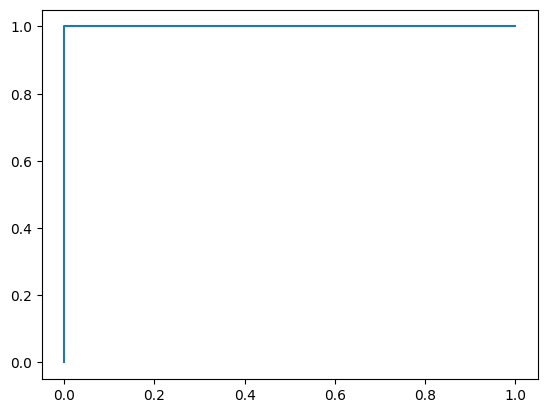

In [37]:
sample_model = GradientBoostingClassifier()

sample_model.fit(X_train, y_train)
pred = sample_model.predict_proba(X_test)

auc = roc_auc_score(y_test, pred[:, 1])
fpr, tpr, _ = roc_curve(y_test, pred[:,1])

plt.plot(fpr, tpr)

print(auc)

In [40]:
important = sample_model.feature_importances_
import_df = pd.DataFrame(important.reshape(1, -1), columns=[col for col in X.columns])
import_df

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,0.447501,0.215225,3.846005e-16,0.337274,0.0


In [41]:
candidate_col = ["Temperature", "Wind_Speed"]

pca = PCA(n_components=2)
tmp = X.copy()

pca_result = pca.fit_transform(tmp)
pca_col = ['pca_' + str(i) for i in range(pca_result.shape[-1])]
pca_df = pd.DataFrame(pca_result, columns=pca_col).reset_index(drop=True)

X = pd.concat((X, pca_df), axis=1)
X

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,pca_0,pca_1
0,0.548885,0.851343,0.366485,0.504954,0.754789,0.050783,0.018266
1,0.715305,0.235520,0.297292,0.049759,0.185236,-0.439760,-0.321972
2,0.602850,0.758193,0.068145,0.148433,0.397213,-0.458794,-0.177359
3,0.544954,0.633821,0.352225,0.672518,0.038677,-0.262982,-0.159416
4,0.423693,0.955157,0.231829,0.476696,0.011989,-0.541138,-0.034719
...,...,...,...,...,...,...,...
2495,0.471715,0.218107,0.590184,0.550391,0.546942,0.161838,0.029001
2496,0.702452,0.235407,0.544045,0.397069,0.416769,-0.002359,-0.214712
2497,0.724449,0.197337,0.144443,0.758410,0.279952,0.035513,-0.393160
2498,0.191548,0.398658,0.118308,0.023641,0.951810,-0.124237,0.291875


In [42]:
X['mean'] = X[candidate_col].mean(axis=1)
X['max'] = X[candidate_col].max(axis=1)
X['min'] = X[candidate_col].min(axis=1)
X['std'] = X[candidate_col].mean(axis=1)
X

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,pca_0,pca_1,mean,max,min,std
0,0.548885,0.851343,0.366485,0.504954,0.754789,0.050783,0.018266,0.457685,0.548885,0.366485,0.457685
1,0.715305,0.235520,0.297292,0.049759,0.185236,-0.439760,-0.321972,0.506299,0.715305,0.297292,0.506299
2,0.602850,0.758193,0.068145,0.148433,0.397213,-0.458794,-0.177359,0.335497,0.602850,0.068145,0.335497
3,0.544954,0.633821,0.352225,0.672518,0.038677,-0.262982,-0.159416,0.448589,0.544954,0.352225,0.448589
4,0.423693,0.955157,0.231829,0.476696,0.011989,-0.541138,-0.034719,0.327761,0.423693,0.231829,0.327761
...,...,...,...,...,...,...,...,...,...,...,...
2495,0.471715,0.218107,0.590184,0.550391,0.546942,0.161838,0.029001,0.530950,0.590184,0.471715,0.530950
2496,0.702452,0.235407,0.544045,0.397069,0.416769,-0.002359,-0.214712,0.623249,0.702452,0.544045,0.623249
2497,0.724449,0.197337,0.144443,0.758410,0.279952,0.035513,-0.393160,0.434446,0.724449,0.144443,0.434446
2498,0.191548,0.398658,0.118308,0.023641,0.951810,-0.124237,0.291875,0.154928,0.191548,0.118308,0.154928


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
lc = LogisticRegression()

In [49]:
models = [rfc, abc, gbc, lc]
accs, aucs = [], []

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict_proba(X_test)
    
    acc = accuracy_score(y_test, np.argmax(pred, axis=1))
    auc = roc_auc_score(y_test, pred[:, 1])
    accs.append(acc)
    aucs.append(auc)
    
result = pd.DataFrame({'acc':accs, 'aucs':auc}, index=[type(model).__name__ for model in models]).sort_values(by='acc')
result

,acc,aucs
LogisticRegression,0.930,0.957546
RandomForestClassifier,0.996,0.957546
AdaBoostClassifier,0.998,0.957546
GradientBoostingClassifier,1.000,0.957546


In [50]:
models = { 
        'RandomForestClassifier' : (RandomForestClassifier(), {
            'max_depth' : [5, 10, 20],
            'min_samples_leaf' : [5, 10]
        }),
        'AdaBoostClassifier' : (AdaBoostClassifier(), {
            'learning_rate' : [1, 0.1, 0.01]}),
        'GradientBoostingClassifier' : (GradientBoostingClassifier(), {
            'max_depth' : [5, 10, 20],
            'min_samples_leaf' : [5, 10]
        })
        }

In [52]:
result = []

for model_name, (model, params) in models.items():
    search = GridSearchCV(model, params, scoring='accuracy')
    search.fit(X_train, y_train)
    print(f"{model_name} training")
    
    best_model = search.best_estimator_
    best_param = search.best_params_
    print(f"Best param : {best_param}")
    
    pred = best_model.predict_proba(X_test)
    auc = roc_auc_score(y_test, pred[:, 1])
    print(auc)

RandomForestClassifier training
Best param : {'max_depth': 20, 'min_samples_leaf': 5}
1.0
AdaBoostClassifier training
Best param : {'learning_rate': 1}
0.9940200388103442
GradientBoostingClassifier training
Best param : {'max_depth': 5, 'min_samples_leaf': 5}
1.0


In [73]:
train_rfc = np.zeros((len(X_train), 2))
scores = []

stk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(stk.split(X_train, y_train)):
    X_train2, X_val = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    rf_model = RandomForestClassifier(max_depth=20, min_samples_leaf=5)
    model.fit(X_train2, y_train2)
    pred = model.predict(X_val)
    proba = model.predict_proba(X_val)
    
    acc = accuracy_score(y_val, pred)
    auc = roc_auc_score(y_val, proba[:, 1])
    
    print(str(i) + '_th acc score: ' + str(acc) + '| auc score: ' + str(auc))
    scores.append(auc)
    train_rfc[test_idx] += proba
    
print(f"Mean score: {np.mean(scores)}")

0_th acc score: 0.9925| auc score: 1.0
1_th acc score: 0.9975| auc score: 1.0
2_th acc score: 0.9975| auc score: 1.0
3_th acc score: 0.995| auc score: 1.0
4_th acc score: 0.99| auc score: 1.0
Mean score: 1.0


<AxesSubplot: >

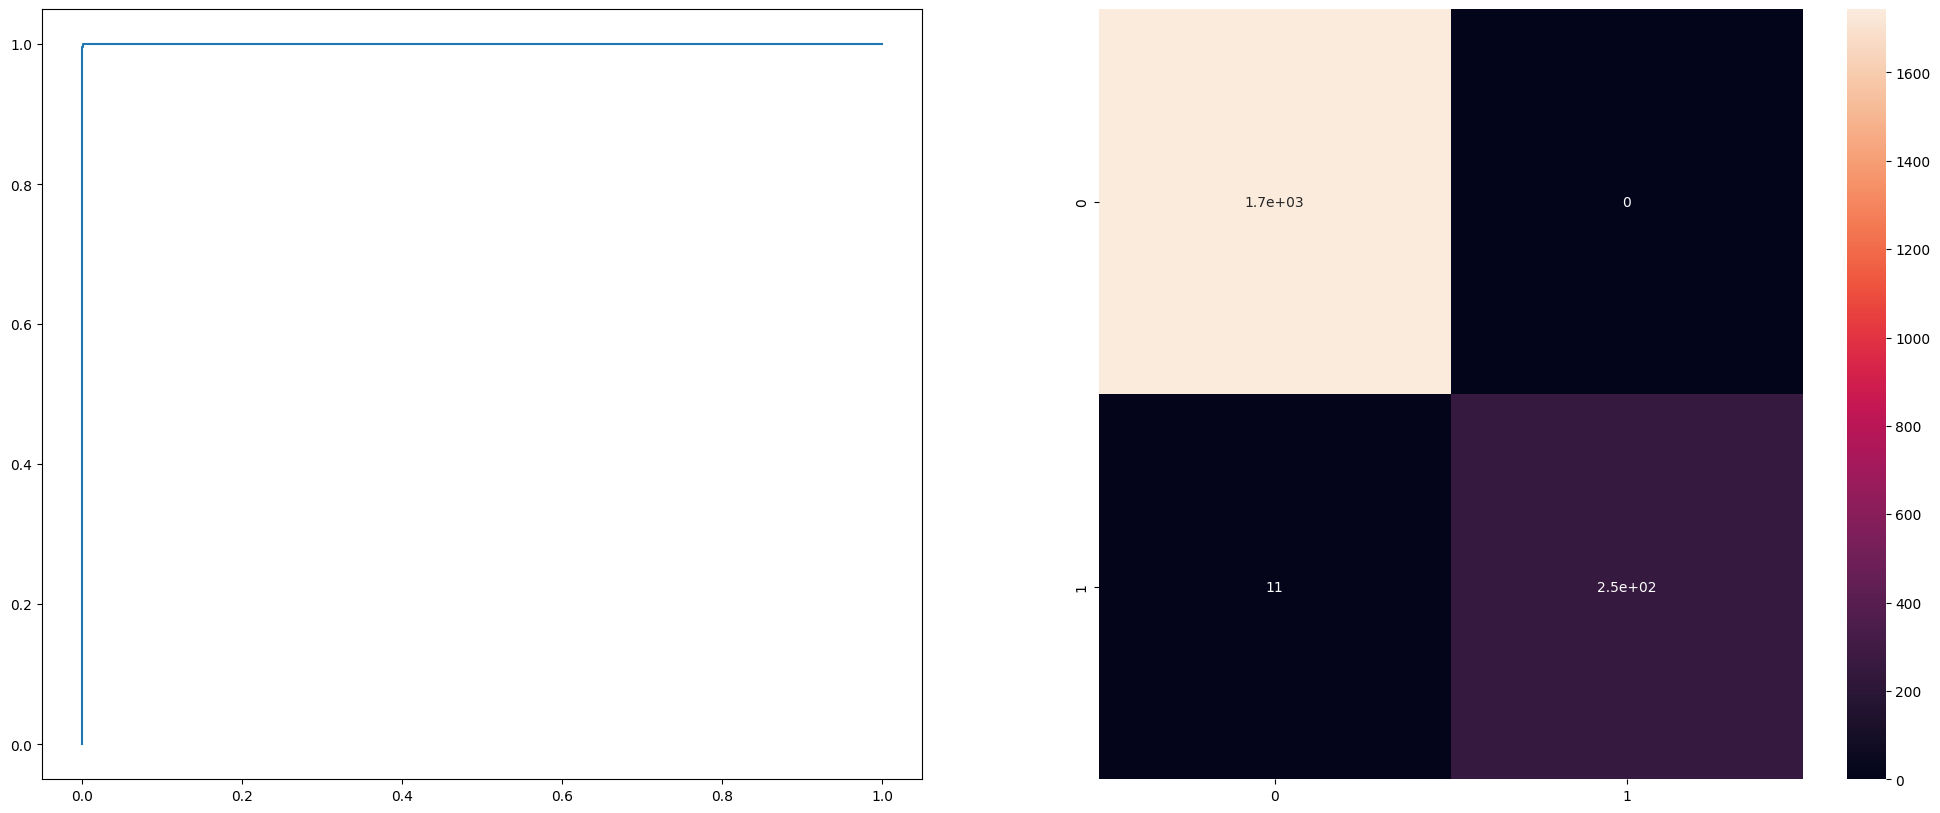

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(25,10))

plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_train, train_rfc[:,1])
plt.plot(fpr, tpr)

plt.subplot(1, 2, 2)
confusion = confusion_matrix(y_train, np.argmax(train_rfc, axis=1))
sns.heatmap(confusion, annot=True)

In [76]:
train_abc = np.zeros((len(X_train), 2))
scores = []

stk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(stk.split(X_train, y_train)):
    X_train2, X_val = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    ab_model =AdaBoostClassifier(learning_rate= 1)
    model.fit(X_train2, y_train2)
    pred = model.predict(X_val)
    proba = model.predict_proba(X_val)
    
    acc = accuracy_score(y_val, pred)
    auc = roc_auc_score(y_val, proba[:, 1])
    
    print(str(i) + '_th acc score: ' + str(acc) + '| auc score: ' + str(auc))
    scores.append(auc)
    train_abc[test_idx] += proba
    
print(f"Mean score: {np.mean(scores)}")

0_th acc score: 0.995| auc score: 1.0
1_th acc score: 0.9975| auc score: 0.999831451205124
2_th acc score: 1.0| auc score: 1.0
3_th acc score: 1.0| auc score: 1.0
4_th acc score: 0.99| auc score: 1.0
Mean score: 0.9999662902410247


Text(1340.0404040404037, 0.5, 'actual')

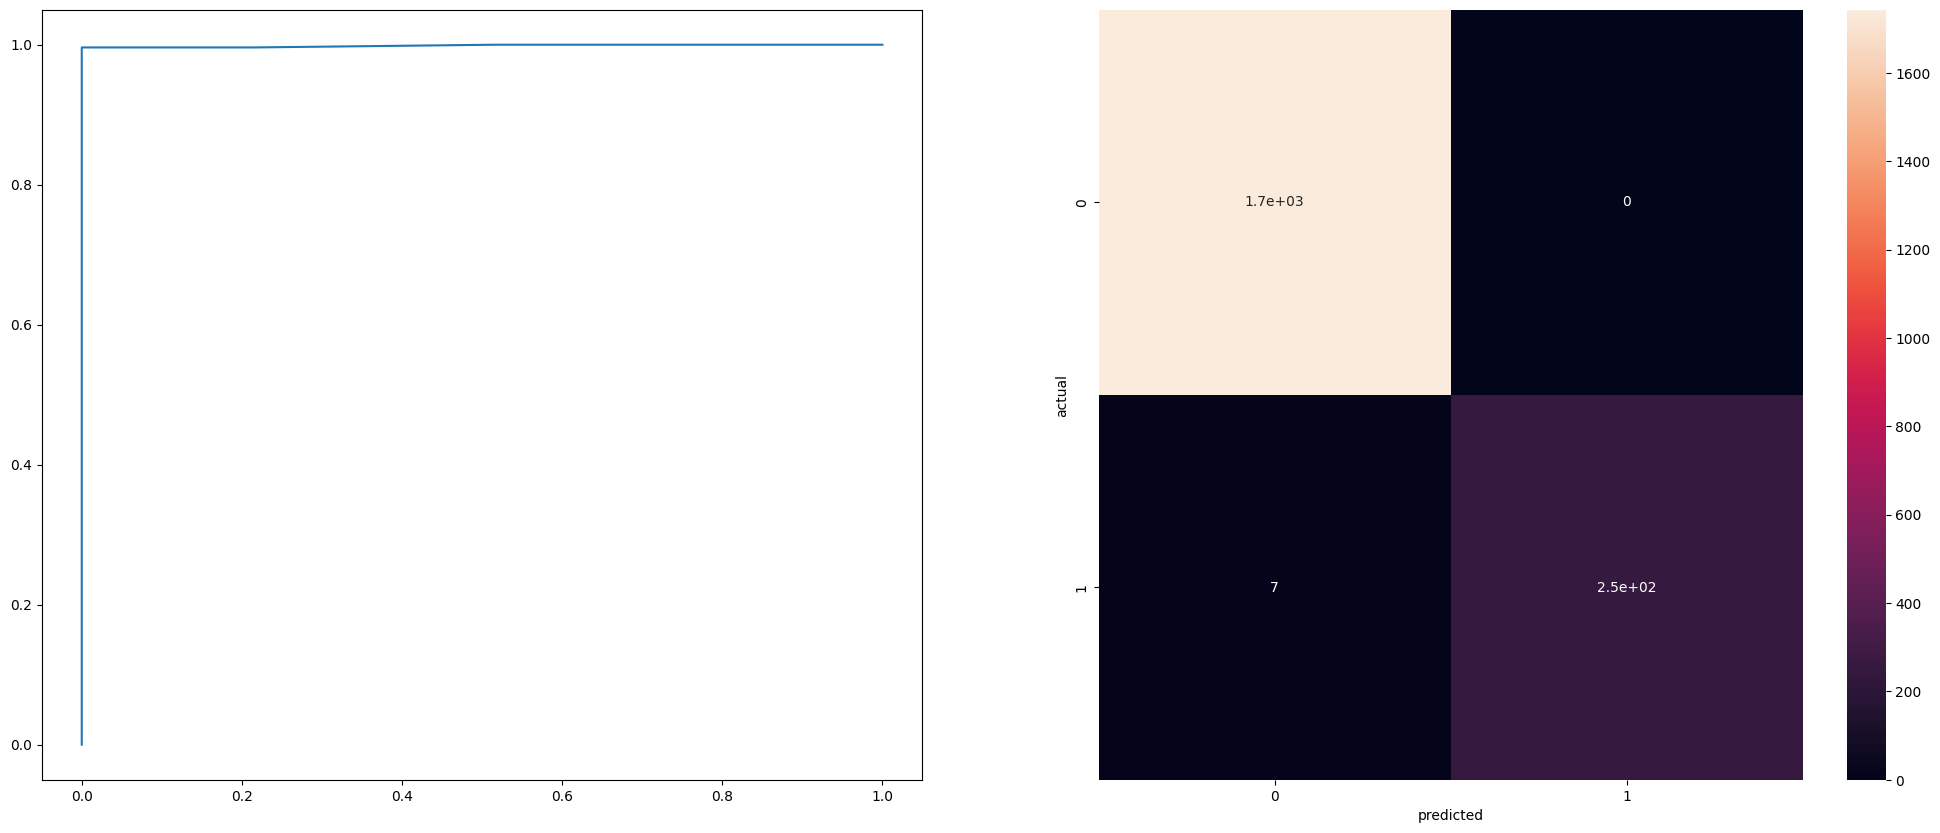

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(25,10))

plt.subplot(1,2,1)
fpr2, tpr2, _ = roc_curve(y_train, train_abc[:,1])
plt.plot(fpr, tpr)

plt.subplot(1,2,2)
confusion = confusion_matrix(y_train, np.argmax(train_abc, axis=1))
sns.heatmap(confusion, annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")

In [84]:
train_gbc = np.zeros((len(X_train), 2))
scores = []
stk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i, (train_idx, test_idx) in enumerate(stk.split(X_train, y_train)):
    X_train2, X_val = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    gb_model = GradientBoostingClassifier(max_depth=5, min_samples_leaf=5)
    gb_model.fit(X_train2, y_train2)
    
    pred = gb_model.predict(X_val)
    proba = gb_model.predict_proba(X_val)
    
    acc = accuracy_score(y_val, pred)
    auc = roc_auc_score(y_val, proba[:, 1])
    
    print(f"{i}_th acc score: {acc} | auc score: {auc}")
    
    scores.append(auc)
    train_gbc[test_idx] += proba
    
print(f"Mean auc score: {np.mean(scores)}")

{i}_th acc score: {acc} | auc score: {auc}
{i}_th acc score: {acc} | auc score: {auc}
{i}_th acc score: {acc} | auc score: {auc}
{i}_th acc score: {acc} | auc score: {auc}
{i}_th acc score: {acc} | auc score: {auc}
Mean auc score: 0.9977920107871228


Text(1340.0404040404037, 0.5, 'actual')

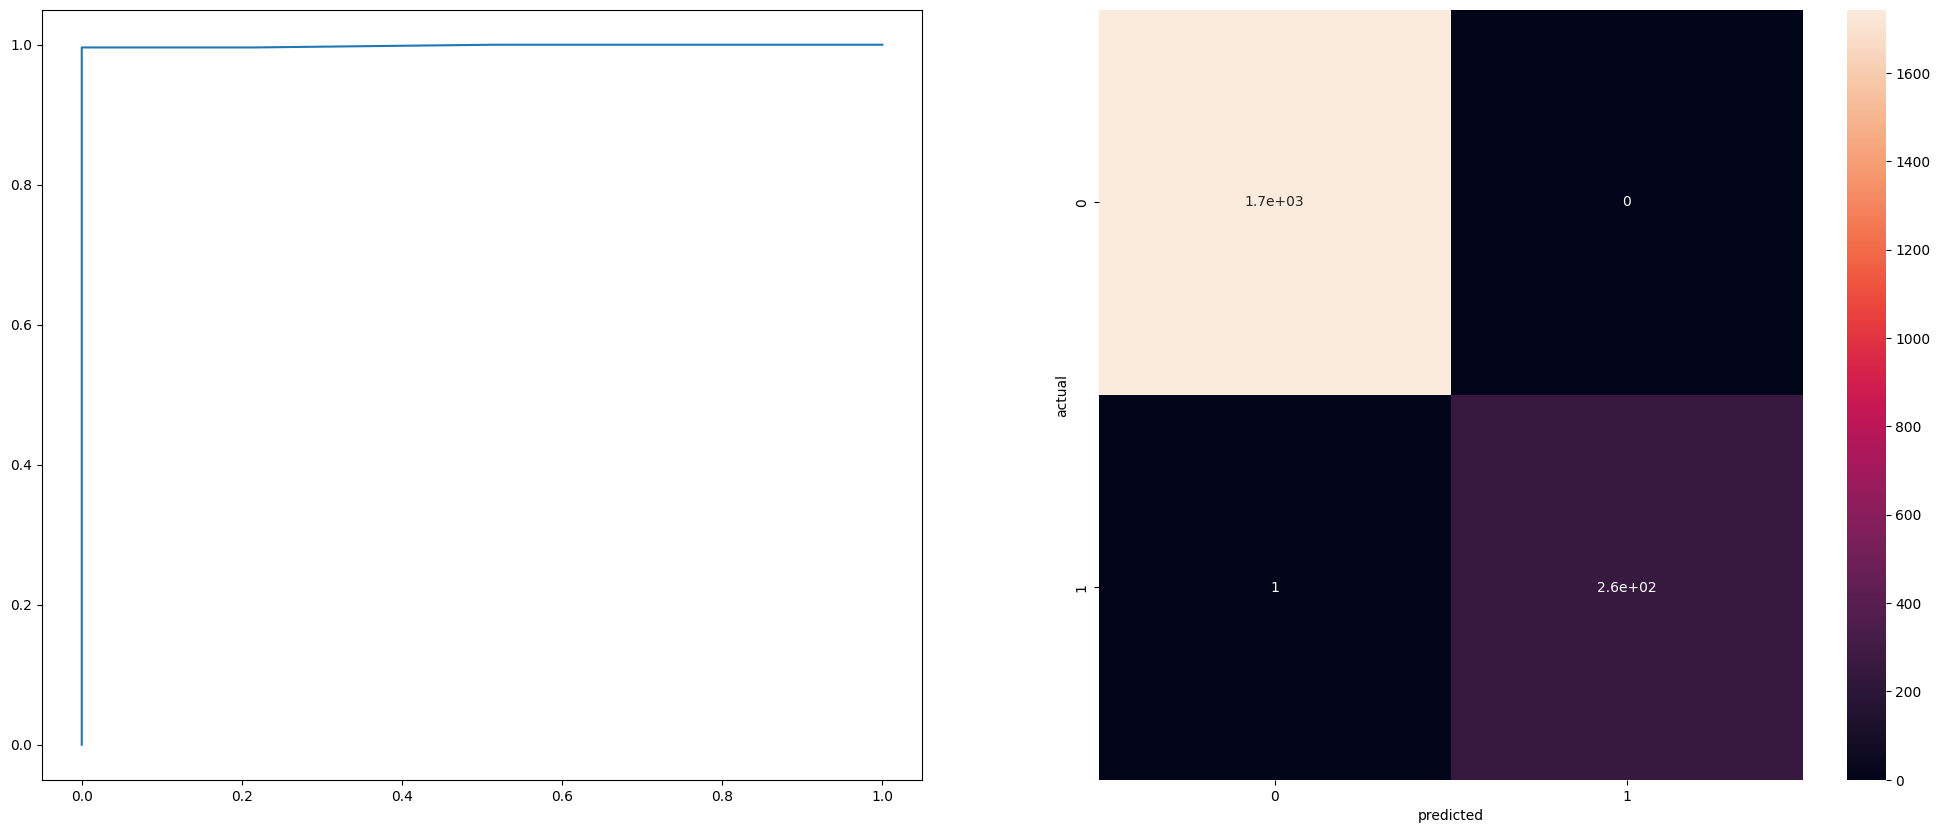

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

plt.subplot(1,2,1)
fpr3, tpr3, _ = roc_curve(y_train, train_gbc[:, 1])
plt.plot(fpr, tpr)

plt.subplot(1,2,2)
confusion = confusion_matrix(y_train, np.argmax(train_gbc, axis=1))
sns.heatmap(confusion, annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")

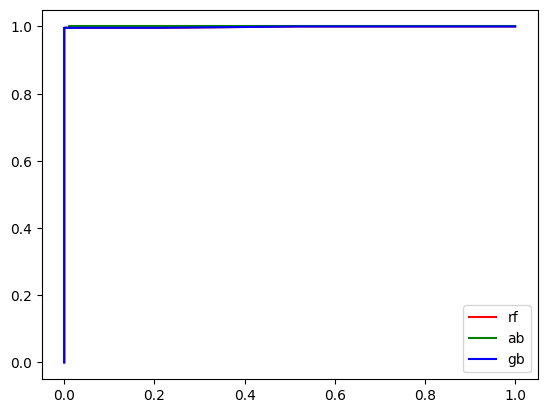

In [90]:
plt.plot(fpr, tpr, color='r', label="rf")
plt.plot(fpr2, tpr2, color='g', label="ab")
plt.plot(fpr3, tpr3, color='b', label="gb")
plt.legend()

In [109]:
final_train = np.zeros((len(X_train), 2))
final_test = np.zeros((5, len(X_test), 2))
scores = []

stk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_idx, test_idx) in enumerate(stk.split(X_train, y_train)):
    final = VotingClassifier(estimators=[('rf', rf_model), ('ab', ab_model), ('gb', gb_model)], voting='soft', weights=[3,2,1])
    X_train2, X_val = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
    y_train2, y_val = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    final.fit(X_train2, y_train2)
    pred = final.predict(X_val)
    proba = final.predict_proba(X_val)
    
    acc = accuracy_score(y_val, pred)
    auc = roc_auc_score(y_val, proba[:, 1])
    
    scores.append(auc)
    final_train[test_idx] += proba
    test_proba = final.predict_proba(X_test)
    final_test[i] += test_proba
    
    print(f"{i}th acc score : {acc} | auc score: {auc}")
print(f"Mean auc score : {np.mean(scores)}")

0th acc score : 1.0 | auc score: 1.0
1th acc score : 0.9975 | auc score: 1.0
2th acc score : 1.0 | auc score: 1.0
3th acc score : 1.0 | auc score: 1.0
4th acc score : 0.995 | auc score: 1.0
Mean auc score : 1.0


Text(1340.0404040404037, 0.5, 'Actual')

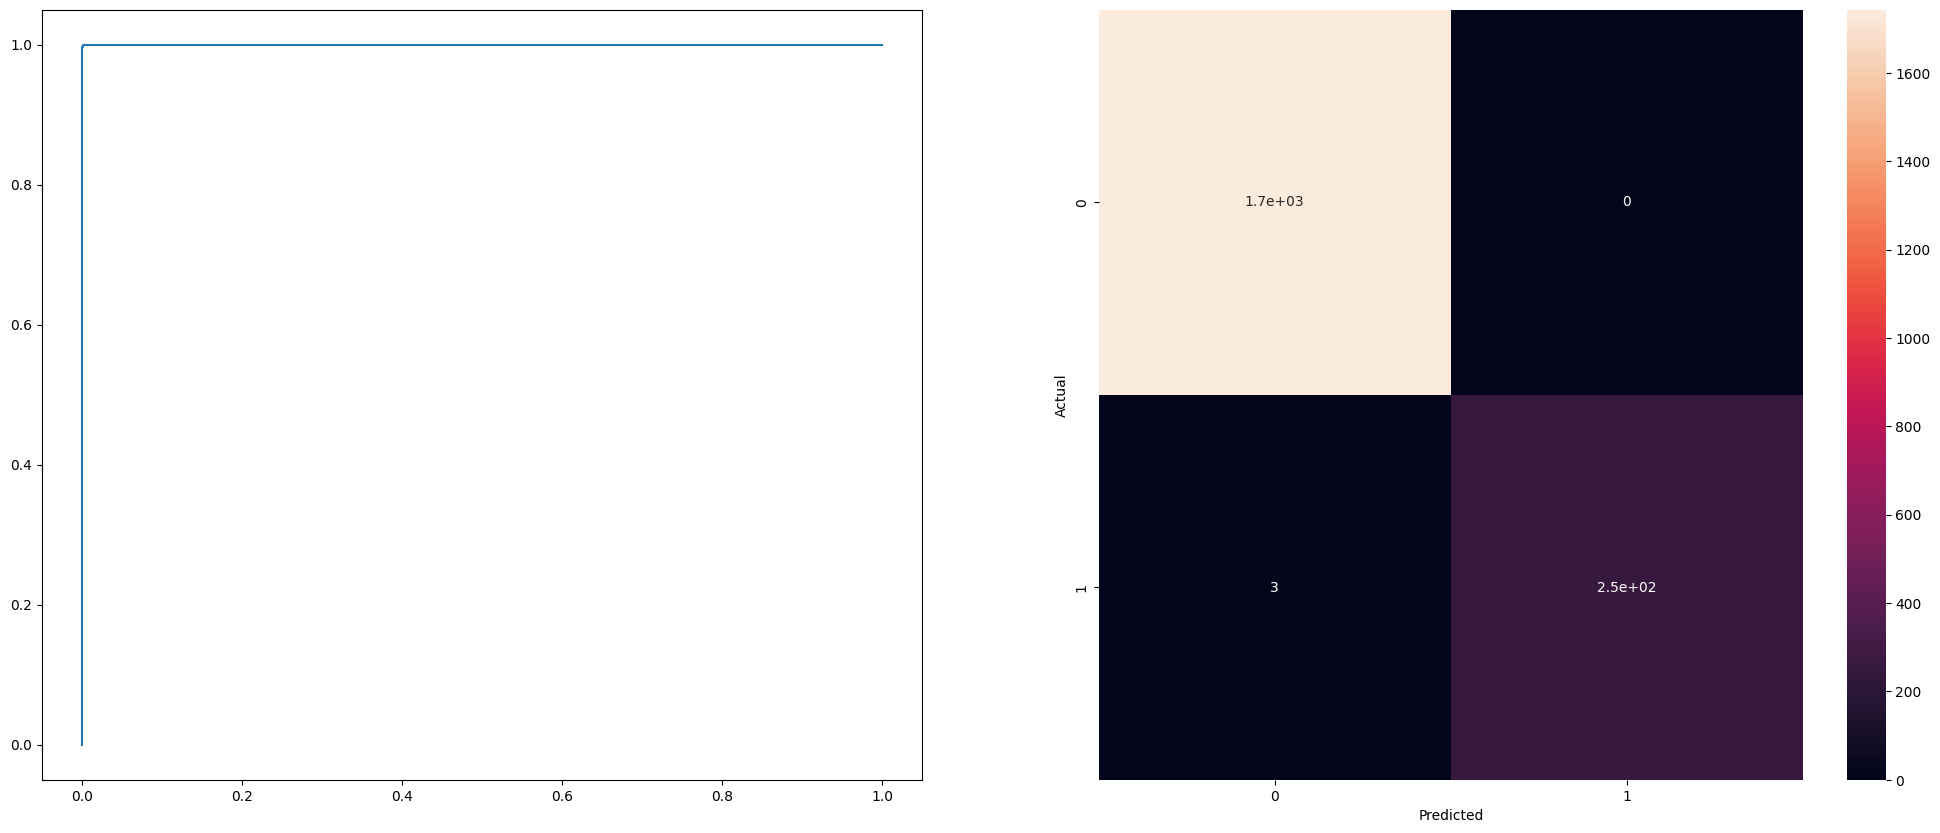

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(25,10))

plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_train, final_train[:, 1])
plt.plot(fpr, tpr)

plt.subplot(1,2,2)
confusion = confusion_matrix(y_train, np.argmax(final_train, axis=1))
sns.heatmap(confusion, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [105]:
final_test = np.mean(final_test, axis=0)
final_test.shape

(500, 2)

In [110]:
final_test

array([[[9.99999033e-01, 9.67388562e-07],
        [9.69821872e-01, 3.01781282e-02],
        [7.19384451e-01, 2.80615549e-01],
        ...,
        [5.88246579e-02, 9.41175342e-01],
        [9.65160441e-01, 3.48395591e-02],
        [9.90189116e-01, 9.81088431e-03]],

       [[9.99999033e-01, 9.67388562e-07],
        [9.74417204e-01, 2.55827960e-02],
        [3.49566069e-01, 6.50433931e-01],
        ...,
        [3.95462280e-02, 9.60453772e-01],
        [9.70222108e-01, 2.97778918e-02],
        [9.77901151e-01, 2.20988486e-02]],

       [[9.99999033e-01, 9.67388562e-07],
        [9.97907276e-01, 2.09272413e-03],
        [7.13385741e-01, 2.86614259e-01],
        ...,
        [4.14786066e-02, 9.58521393e-01],
        [9.83977789e-01, 1.60222113e-02],
        [9.67058651e-01, 3.29413485e-02]],

       [[9.99999037e-01, 9.62727773e-07],
        [9.78702324e-01, 2.12976761e-02],
        [7.11252697e-01, 2.88747303e-01],
        ...,
        [4.35110733e-02, 9.56488927e-01],
        [9.8952131

In [107]:
submission = pd.DataFrame({"final": final_test[:, 1]})
submission 

,final
0,9.655242e-07
1,2.054671e-02
2,2.995575e-01
3,3.108089e-03
4,9.731877e-04
...,...
495,1.889346e-02
496,9.655242e-07
497,9.638361e-01
498,2.716800e-02
